In [1]:
import numpy as np
import pandas as pd
import os
import sys
import cv2
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append('../')

In [2]:
from configs.config import CONF

In [3]:
X_test_original = np.load(os.path.join(CONF.PATH.DATASET, "all", "X_test.npy"))
X_test_original = X_test_original.reshape(-1, 20, 20)
X_test_original.shape

(24922, 20, 20)

In [4]:
def show(X):
    fig, axes = plt.subplots(3, 5, figsize=(9, 5))
    for i in range(3):
        for j in range(5):
            axes[i, j].imshow(X[i*5+j], cmap='gray', vmin=0, vmax=255)
            axes[i, j].axis('off')
    plt.show()

def show_one(X):
    plt.figure(figsize=(2, 2))
    plt.imshow(X, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def show_two(X):
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(X[0], cmap='gray', vmin=0, vmax=255)
    axes[0].axis('off')
    axes[1].imshow(X[1], cmap='gray', vmin=0, vmax=255)
    axes[1].axis('off')
    plt.show()

def show_three(X):
    fig, axes = plt.subplots(1, 3, figsize=(6, 2))
    axes[0].imshow(X[0], cmap='gray', vmin=0, vmax=255)
    axes[0].axis('off')
    axes[1].imshow(X[1], cmap='gray', vmin=0, vmax=255)
    axes[1].axis('off')
    axes[2].imshow(X[2], cmap='gray', vmin=0, vmax=255)
    axes[2].axis('off')
    plt.show()

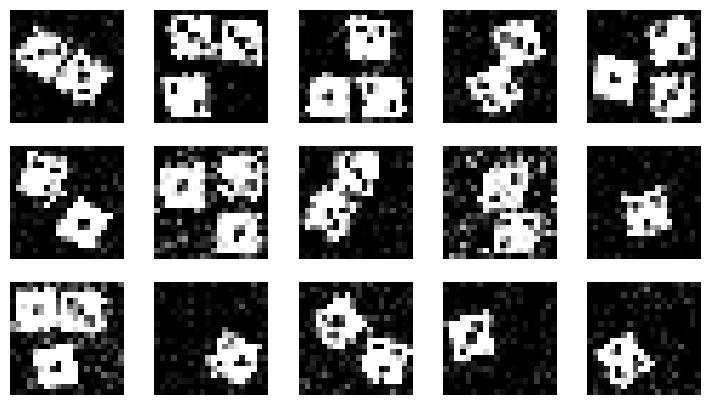

In [5]:
show(X_test_original)

Original Shape: (20, 20)
Expanded Shape: (224, 224)


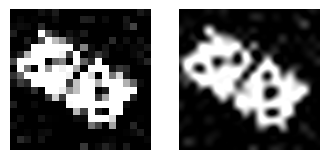

In [7]:
import numpy as np
from scipy.ndimage import zoom

original_image = X_test_original[0]

# 拡大倍率を計算
zoom_factor = 224 / 20

# zoom関数を使用して画像を拡大
expanded_image = zoom(original_image, zoom_factor)

# 結果を確認
print("Original Shape:", original_image.shape)
print("Expanded Shape:", expanded_image.shape)

show_two([original_image, expanded_image])

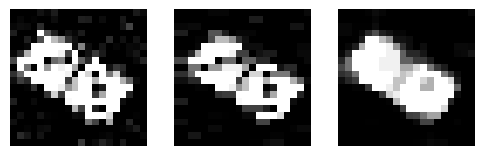

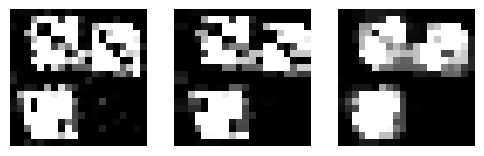

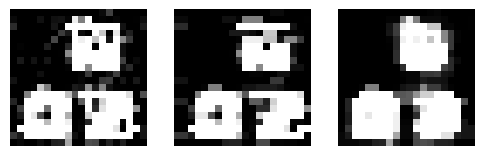

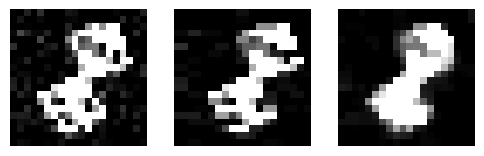

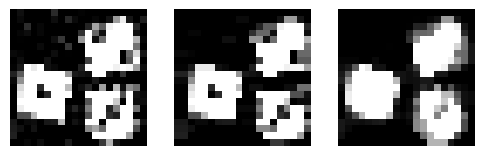

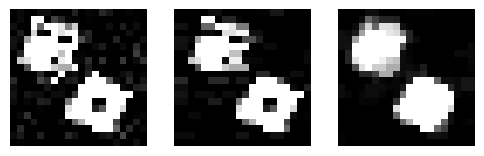

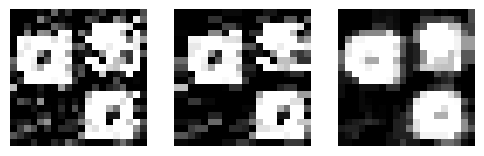

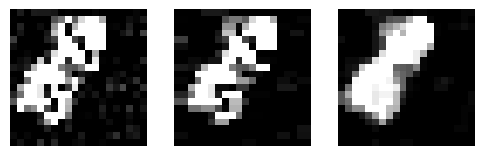

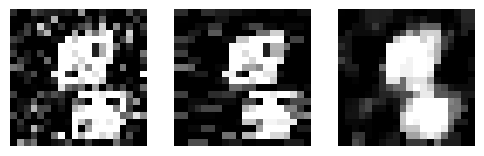

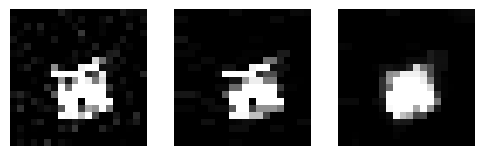

In [75]:
for i in range(10):
    x = X_test_original[i]

    neiborhood = np.array([[1, 1]],
                np.uint8)
    x_erode = cv2.erode(x,neiborhood,iterations=1)
    x_dilate = cv2.dilate(x_erode,neiborhood,iterations=1)

    ksize=3
    x_mask = cv2.medianBlur(x,ksize)
    show_three([x, x_dilate, x_mask])



In [76]:
def denoise(X):
    X_denoise = []
    for x in X:
        neiborhood = np.array([[1, 1]], np.uint8)
        x_erode = cv2.erode(x,neiborhood,iterations=1)
        x_dilate = cv2.dilate(x_erode,neiborhood,iterations=1)
        X_denoise.append(x_dilate)
    return np.array(X_denoise)

In [78]:
X_test_denoised = denoise(X_test_original)
X_test_denoised.shape

(24922, 20, 20)

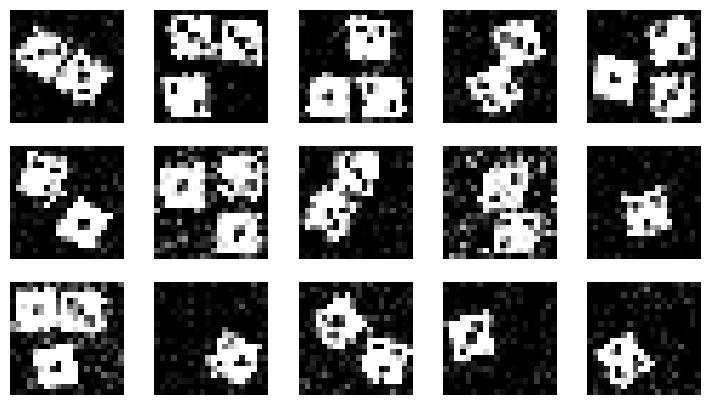

In [79]:
show(X_test_original)

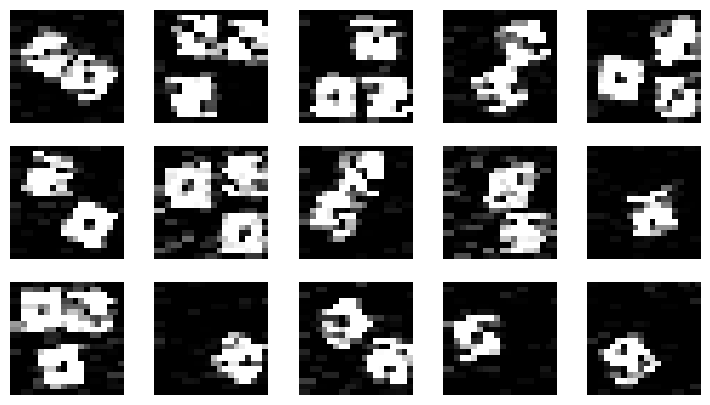

In [80]:
show(X_test_denoised)